## Object reconstruction from a cloud of points in 2D using $\alpha$-shapes and Vietoris-Rips complexes

We will generate a cloud of points in 2D space, in our example a circle. Then Vietoris-Rips, Chech and $\alpha$-complexes for the given radius will be constructed. 

The number of simplices for each construction will be determined and the resulting complex drawn using matplotlib.

Let us start with Vietoris-Rips and $\alpha$ complexes, since we can calculate them from Python. First some basic imports and helper functions.

In [2]:
import dionysus
import math
from random import random
from matplotlib import pyplot
import numpy as np
import time
import diode

Now we define methods for generating a cloud of points and drawing.

In [3]:
def generate_circle(n, radius, max_noise):
    """
    Generate n points on a sphere with the center in the point (0,0) 
    with the given radius. 
    
    Noise is added so that the distance from
    the generated point to some point on the sphere does not
    exceed max_noise parameter.
    
    Returns the list of generated points.    
    """
    points = []
    for i in range(n):
        angle = 2 * math.pi * random()
        noise = max_noise * random()
        r = radius * (1 + noise)
        point = [r * math.cos(angle), r * math.sin(angle)]
        points.append(point)
    return points

In [30]:
def plot_points(points, figure=None, radius=0, color='r'):
    """
    Plot the given list of points on the given figure using matplotlib. 
    If figure is not specified plot on the current figure.
    
    If radius is bigger than zero, then around each
    point the ball centered in the point with the 
    given radius and color will be drawn. If color is not given 
    circles are drawn using red color.
    """
    xs, ys = map(list, zip(*points))
    pyplot.axis([min(xs)-1, max(xs)+1,min(ys)-1,max(ys)+1])
    pyplot.plot(xs, ys, 'ro')
    if radius > 0:
        if figure is None:
            figure = pyplot.gcf()
        axes = figure.gca()
        for circle in [pyplot.Circle(point, radius, color=color)
                       for point in points]:
            axes.add_artist(circle)

In [97]:
def get_points(points, indices):
    '''
    Get data from point array on the given indices.
    Useful since simplex spanned by a list of points
    is given as a list of positions of the points
    in a points array.
    '''
    return [points[index] for index in indices]

def draw_triangle(triangle):
    '''
    Draw a triangle on the current figure. 
    Triangle must be given as a list of three 2D points, 
    each point as a list of two numbers.
    '''
    p1, p2, p3 = triangle
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    pyplot.plot([p1[0], p3[0]],[p1[1],p3[1]])
    pyplot.plot([p2[0], p3[0]],[p2[1],p3[1]])
        
def draw_line(line):
    '''
    Draw a line on the current figure.
    Line must be given as a list of two 2D points, 
    each point as a list of two numbers.    
    '''
    p1, p2 = line
    pyplot.plot([p1[0], p2[0]],[p1[1],p2[1]])
    
def draw_point(point):
    '''
    Draw a point on the current figure.
    Point must be given as a list of two numbers.    
    '''
    pyplot.plot(point)

def draw_simplicial_complex(simplices, points):
    '''
    Draw 2D simplicial complex on the current figure. 
    Input must be a list of simplices, each simplex a
    list of indices in the points array. 
    '''
    handlers = [draw_point, draw_line, draw_triangle]
    for simplex in simplices:
        handlers[len(simplex)-1](get_points(points, simplex))

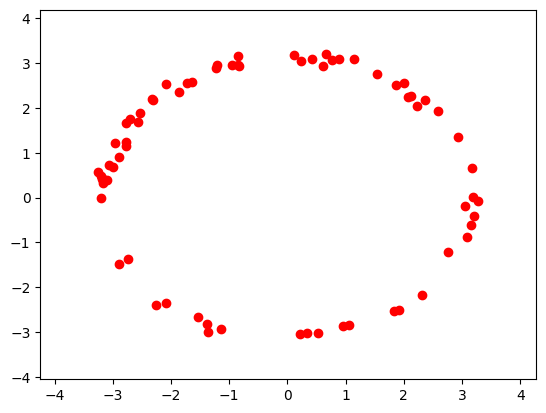

In [98]:
%matplotlib inline
circle = generate_circle(70, 3, 0.1)
plot_points(circle, color="r")

Now construct $\alpha$-shapes and Vietoris-Rips complex from this cloud of points.

In [99]:
def rips(points, skeleton, max):
    """
    Generate the Vietoris-Rips complex on the given set of points in 2D.
    Only simplexes up to dimension skeleton are computed.
    The max parameter denotes the distance cut-off value.
    """
    print(time.asctime(), "Starting Rips complex generation.")
    rips = dionysus.fill_rips(np.array(points), skeleton, max)
    print(time.asctime(), "Generated complex: %d simplices" % len(rips))
    return rips

Sat Nov 25 16:01:49 2023 Starting Rips complex generation.
Sat Nov 25 16:01:49 2023 Generated complex: 2899 simplices


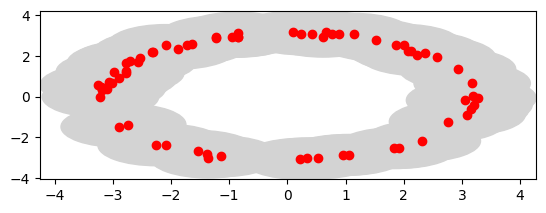

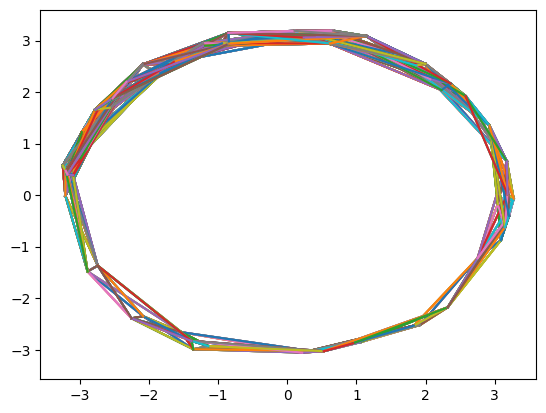

In [104]:
%matplotlib inline
radius = 1
rips_complex = rips(points=circle, skeleton=2, max=2*radius)
pyplot.subplot(211)
plot_points(circle, radius=radius, color="lightgray")
pyplot.figure(100)
draw_simplicial_complex(rips_complex, circle)


Sat Nov 25 16:01:53 2023 Starting Rips complex generation.
Sat Nov 25 16:01:53 2023 Generated complex: 9534 simplices


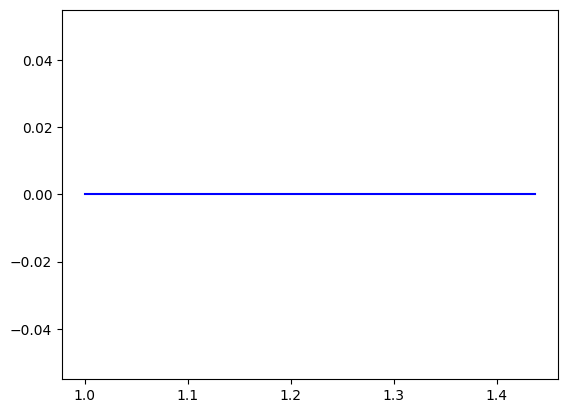

In [105]:
rips_complex = rips(points=circle, skeleton=3, max=2*radius)
persistence = dionysus.homology_persistence(rips_complex)
diagrams = dionysus.init_diagrams(persistence, rips_complex)
dionysus.plot.plot_bars(diagrams[1], show = True)

In [106]:
# Output generators by dimension. 
# Note: the computed Rips must have skeleton argument at least dimension + 1,
# where dimension is the last dimension of homology we are interested in.
inf = float("inf")
for i in range(3):
    print(f"Generators in dimension {i}:")
    dgm = diagrams[i]
    for p in dgm:
        if p.death == inf:
            print(p)

Generators in dimension 0:
(0,inf)
Generators in dimension 1:
(1.43748,inf)
Generators in dimension 2:


Now just compute the entire Vietoris-Rips complex without restriction on the top dimension. Print also the dimension of such complex. As you can see the complex becomes big pretty fast.

In [67]:
radius = 0.5
max_dimension = 10000
rips_complex = rips(points=circle, skeleton=max_dimension, max=2*radius)
print('Dimension', max((len(s) for s in rips_complex)))

Sat Nov 25 15:25:35 2023 Starting Rips complex generation.
Sat Nov 25 15:25:35 2023 Generated complex: 1413 simplices
Dimension 9


In [70]:
radius = 0.75
max_dimension = 10000
rips_complex = rips(points=circle, skeleton=max_dimension, max=2*radius)
print('Dimension', max((len(s) for s in rips_complex)))

Sat Nov 25 15:27:37 2023 Starting Rips complex generation.
Sat Nov 25 15:27:37 2023 Generated complex: 6124 simplices
Dimension 11


In [72]:
radius = 2
max_dimension = 10000
rips_complex = rips(points=circle, skeleton=max_dimension, max=2*radius)
print('Dimension', max((len(s) for s in rips_complex)))

Sat Nov 25 15:28:01 2023 Starting Rips complex generation.
Sat Nov 25 15:28:31 2023 Generated complex: 17430528 simplices
Dimension 22


In [108]:
def alpha_shapes(points):
    """
    Generate the Alpha shapes complex on the given set of points in 2D.

    It requires no argument: only 2D and 3D shapes are supported and the
    dimension is infered from the points.
    """
    print(time.asctime(), "Starting Alpha shapes complex generation.")
    alpha = diode.fill_alpha_shapes(np.array(points))
    print(time.asctime(), "Generated complex: %d simplices" % len(alpha))
    return alpha

Sat Nov 25 16:03:00 2023 Starting Alpha shapes complex generation.
Sat Nov 25 16:03:00 2023 Generated complex: 365 simplices


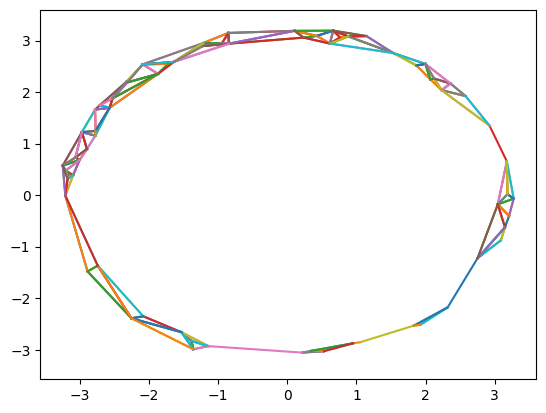

In [111]:
%matplotlib inline
radius = 1
alpha_complex = alpha_shapes(points=circle)
pyplot.figure(100)
# Just filter simplices that have radious less than 1.
radious = 1
simplices = [entry[0] for entry in alpha_complex if entry[1] <= radious]
draw_simplicial_complex(simplices, circle)

Sat Nov 25 16:10:00 2023 Starting Alpha shapes complex generation.
Sat Nov 25 16:10:00 2023 Generated complex: 365 simplices


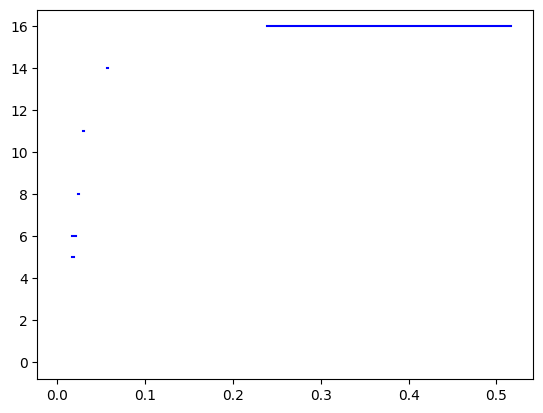

In [122]:
radious = 1
alpha_complex = alpha_shapes(points=circle)
filtered_alpha_complex = [entry for entry in alpha_complex if entry[1] <= radious]
filtration = dionysus.Filtration(filtered_alpha_complex)
persistence = dionysus.homology_persistence(filtration)
diagrams = dionysus.init_diagrams(persistence, filtration)
dionysus.plot.plot_bars(diagrams[1], show = True)

In [123]:
# Output generators by dimension. 
# Note: the computed Rips must have skeleton argument at least dimension + 1,
# where dimension is the last dimension of homology we are interested in.
inf = float("inf")
for i in range(3):
    print(f"Generators in dimension {i}:")
    dgm = diagrams[i]
    for p in dgm:
        if p.death == inf:
            print(p)

Generators in dimension 0:
(0,inf)
Generators in dimension 1:
(0.516585,inf)
Generators in dimension 2:
